In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
data = np.loadtxt('C:/Users/HP/Desktop/abc.txt',delimiter=',')
print(data.shape)
print(data[:5,:])

(100, 3)
[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]]


In [112]:
X = data[:, :2]
y = data[:, -1]
print(X.shape)
print(y.shape)

(100, 2)
(100,)


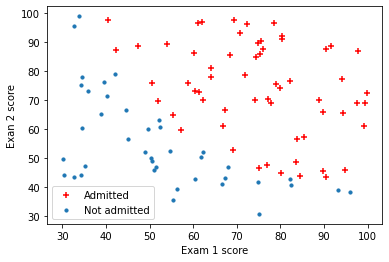

In [113]:
pos, neg =  (y == 1).reshape (100,1), (y==0).reshape (100,1) 
plt.scatter(X[pos[:,0],0], X[pos [:,0], 1],c="r",marker="+") 
plt.scatter(X[neg[:,0],0], X[neg[:,0], 1],marker="o",s=10) 
plt.xlabel("Exam 1 score") 
plt.ylabel("Exan 2 score")
plt.legend( ["Admitted", "Not admitted"], loc=0)

In [114]:
def featureNormalization(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    X_norm = (X-mean)/std
    return X_norm,mean,std

In [115]:
# get number of training examples N= data.shape [0] # should be 100 for this data
N = data.shape[0]
# normalize the features

X_norm, X_mean, X_std = featureNormalization(X)

# stack np.ones((1, N)) to X_form's transpose (2, 100) #to get X_new with dimension (3, 100) ones np.ones ((1, N))
ones = np.ones((1,N))
X_new=np.vstack((ones, X_norm.T))

y = data[:, -1].reshape(1, N)

print (X_new.shape)

print (X_new[:, :5])

print(y.shape)

(3, 100)
[[ 1.          1.          1.          1.          1.        ]
 [-1.60224763 -1.82625564 -1.53903969 -0.28210129  0.69152826]
 [ 0.63834112 -1.2075414   0.3612943   1.0863683   0.49337794]]
(1, 100)


## 2.Define sigmoid function

In [116]:
def sigmoid(x):
    s = 1/(1 + np.exp(-x))
    return s


In [117]:
x = np.array([1,2,3])
sigmoid(x)

array([0.73105858, 0.88079708, 0.95257413])

# 3.Compute cost function and gradient

In [118]:
def compute_cost(w,X,y):
    N = y.shape[1]
    E_w = 0
    gradient = np.zeros(w.shape)
    
    h_w = sigmoid(np.dot(X.T, w))
    E_w =  1/N * np.sum((-y * np.log(h_w)) + (-(1 - y) * np.log(1 - h_w)))

    gradient = 1/N * np.dot(X, (h_w - y.T))
    
    return E_w,gradient

In [119]:
w = np.zeros((3,1))
E_w,gradient = compute_cost(w,X_new,y)
print("cost of initial w is ", E_w)
print("gradient of initial w (zeros):", gradient)

cost of initial w is  69.31471805599453
gradient of initial w (zeros): [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


## 4. Gradient Descent

In [120]:
def gradient_descent(X,y,w,alpha,num_iters):
    N = y.shape[1]
    E_history = []
    for i in range(num_iters):
        E_w,grad = compute_cost(w,X,y)
        h = np.dot(X,theta)
        theta = theta - (alpha/m)*np.dot(X.T,(h-y))
    return w,E_history

## 5. plotting the Decision Boundary

<ipython-input-121-cf103178f9c8>:6: RuntimeWarning: invalid value encountered in true_divide
  y_value= (w[0]+w[1]*x_value)/w[2]


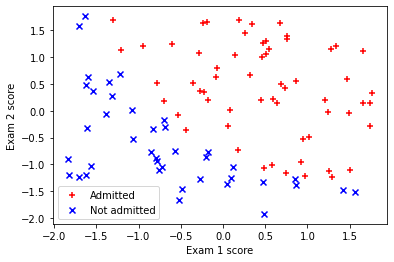

In [121]:
plt.scatter(X_norm[pos[:,0],0],X_norm[pos[:,0], 1],c="r",marker="+",label="Admitted") 
plt.scatter(X_norm[neg[:,0],0],X_norm [neg[:,0],1],c="b",marker="x", label="Not admitted")

# Only need 2 points to define a line, so choose two endpoints 
x_value = np.array([np.min(X_norm[:,1]), np.max(X_norm[:,1])])
y_value= (w[0]+w[1]*x_value)/w[2]

plt.plot(x_value,y_value, "g")

plt.xlabel("Exam 1 score")

plt.ylabel("Exam 2 score")

plt.legend(loc=0)

## 6.Evaluating Logistic Regression Model

In [122]:
def predict(w,X):
    m = X.shape[0]
    h_w = np.zeros(m)
    h_w = sigmoid(np.dot(X.T, w)) >= 0.5   
    return h_w

In [123]:
x_test=np.array([45,85]).reshape(1, 2)
x_test=(x_test - X_mean) / X_std

x_test_t=x_test.T

print(x_test_t.shape)
x_test_new = np.vstack((np.ones((1,1)), x_test_t))
print(x_test_new)

prob = sigmoid(w.T @ x_test_new)

print("For a student with scores 45 and 85, we predict an admission probability of",prob[0,0])

(2, 1)
[[ 1.        ]
 [-1.06629865]
 [ 1.0155961 ]]
For a student with scores 45 and 85, we predict an admission probability of 0.5


In [124]:
train_pred = predict(w,X_new)
print("Train Accuracy:",np.mean(train_pred ==y)*100,"%")

Train Accuracy: 60.0 %
